In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

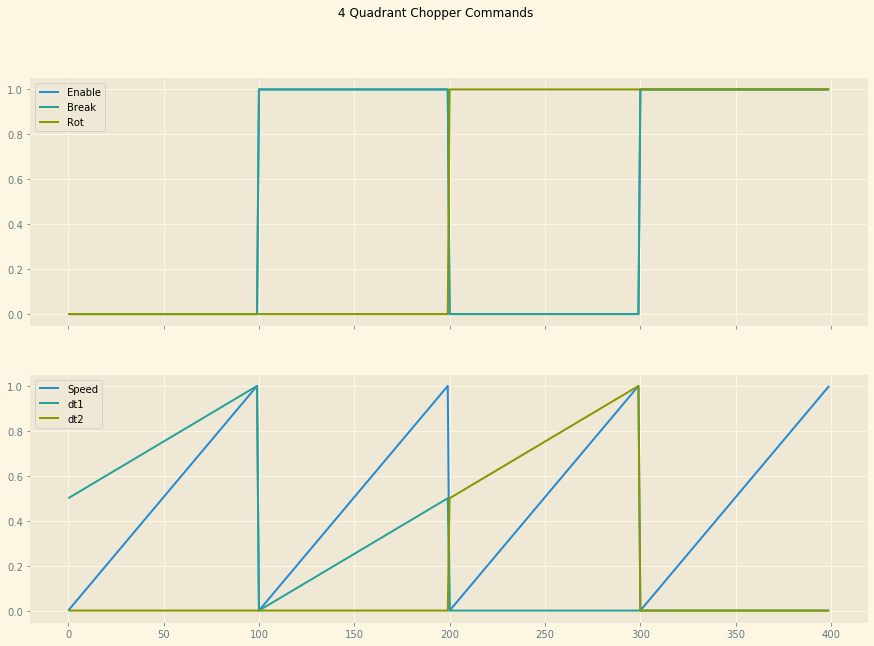

In [47]:
def get_dt1(Speed: float, 
       Enable: bool, 
       Rot: bool, 
       Break: bool) -> float:
  return (Enable & ~Rot) * ( Speed -Break + 1)/2

def get_dt2(Speed: float, 
       Enable: bool, 
       Rot: bool, 
       Break: bool) -> float:
  return (Enable & Rot) * ( Speed -Break + 1)/2

length = 400
Enable = np.array([
    *[True]*(length//4), 
    *[True]*(length//4), 
    *[True]*(length//4),
    *[False]*(length//4),
])
Break = np.array([
    *[False]*(length//4), 
    *[True]*(length//4), 
    *[False]*(length//4),
    *[True]*(length//4),
])
Rot = np.array([
    *[False]*(length//4), 
    *[False]*(length//4), 
    *[True]*(length//4),
    *[True]*(length//4),
])

Speed = np.array(list(np.linspace(0, 1, length//4))*4)

dt1 = get_dt1(Speed, Enable, Rot, Break)
dt2 = get_dt2(Speed, Enable, Rot, Break)

fig, axs = plt.subplots(2, sharex=True, figsize=(15,10))
fig.suptitle('4 Quadrant Chopper Commands')

axs[0].plot(Break, label="Enable")
axs[0].plot(Break, label="Break")
axs[0].plot(Rot, label="Rot")
axs[0].legend()

axs[1].plot(Speed, label="Speed")
axs[1].plot(dt1, label="dt1")
axs[1].plot(dt2, label="dt2")
axs[1].legend()
plt.show()